# spaCy upgrade and package installation.

In [1]:
!pip install -U spacy==3.*
!python -m spacy download en_core_web_sm
!python -m spacy info

     --------------------------------------- 12.8/12.8 MB 13.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2023-09-12 12:01:38.769860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-09-12 12:01:38.770390: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-12 12:01:42.781923: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-09-12 12:01:42.782570: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-09-12 12:01:42.783206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-09-12 12:01:42.783813: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu


============================== Info about spaCy ==============================

spaCy version    3.6.1                         
Location         C:\Users\FireCracker\anaconda3\lib\site-packages\spacy
Platform         Windows-10-10.0.19044-SP0     
Python version   3.10.9                        
Pipelines        en_core_web_sm (3.6.0)        



2023-09-12 12:01:56.033529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-09-12 12:01:56.033564: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-12 12:01:58.091288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-09-12 12:01:58.091942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-09-12 12:01:58.092553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-09-12 12:01:58.093158: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

For topic modelling, we'll use **Gensim**, a popular topic modelling library originally authored by Radim Řehůřek. It has implementations for LDA and other models.<br>
https://radimrehurek.com/gensim/index.html

In [2]:
# Upgrade gensim
# !pip install --upgrade numpy
!pip install -U gensim==4.*

In [3]:
!pip install wordcloud

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import spacy

from gensim import models, corpora
from gensim import similarities
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

# First pass at building an LDA topic model for our corpus

Using a corpus of over 90,000 CNN news articles originally compiled for training question answering models.
([original source](https://cs.nyu.edu/~kcho/DMQA/))

In [5]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding

In [6]:
!pip install --upgrade --no-cache-dir gdown

In [8]:
# Download the CNN corpus.
!gdown 'https://drive.google.com/uc?id=122fC9XpNwFKx0ryRVKJz5MWUTzA3Vpsf'

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id='https://drive.google.com/uc?id=122fC9XpNwFKx0ryRVKJz5MWUTzA3Vpsf' 



The corpus is one large text file with each article in the corpus separated by an *@delimiter* string. We'll split the articles and place them in a list.

In [9]:
with open('cnn_articles.txt', 'r', encoding='utf8') as f:
  articles = f.read().split('@delimiter')

In [10]:
print(len(articles))
print(articles[0])

92579
 -- Children in war-ravaged Afghanistan are safer than those growing up in London or New York, NATO's top civilian envoy says.

Mark Sedwill, the senior civilian representative for NATO, made the comments on an episode of CBBC's "Newsround," which is airing Monday.

In the show -- a BBC current-affairs program for children -- several youngsters in Kabul, Afghanistan, say they are afraid of daily violence and the frequent explosions in their war-torn country.

In response, Sedwill says: "Here in Kabul, and other big cities actually, there are very few of these bombs. The children are probably safer here than they would be in London, New York or Glasgow or many other cities.

"Most children can go about their lives in safety. It's a very family-oriented society. So it is a little bit like a city of villages," he added.

A U.N. report released earlier this year seems to contradict Sedwill's assessment.

The February report, by the special representative for children and armed confli

In [11]:
DATASET_SIZE = 20000
dataset = articles[:DATASET_SIZE]

Filter out punctuations, newlines, and any tokens containing non-alphabetic characters.

In [12]:
nlp = spacy.blank('en')

def basic_filter(tokenized_doc):
  return [t.text for t in tokenized_doc if
          not t.is_punct and \
          not t.is_space and \
          t.is_alpha]

Process the corpus as a batch (or a series of batches) and use multiple processes.

In [13]:
NUM_PROCESS = 4

In [14]:
%%time
tokenized_articles = list(map(basic_filter, nlp.pipe(dataset, n_process=NUM_PROCESS)))

CPU times: total: 51.1 s
Wall time: 1min 11s


In [15]:
print(tokenized_articles[0])

['Children', 'in', 'war', 'ravaged', 'Afghanistan', 'are', 'safer', 'than', 'those', 'growing', 'up', 'in', 'London', 'or', 'New', 'York', 'NATO', 'top', 'civilian', 'envoy', 'says', 'Mark', 'Sedwill', 'the', 'senior', 'civilian', 'representative', 'for', 'NATO', 'made', 'the', 'comments', 'on', 'an', 'episode', 'of', 'CBBC', 'Newsround', 'which', 'is', 'airing', 'Monday', 'In', 'the', 'show', 'a', 'BBC', 'current', 'affairs', 'program', 'for', 'children', 'several', 'youngsters', 'in', 'Kabul', 'Afghanistan', 'say', 'they', 'are', 'afraid', 'of', 'daily', 'violence', 'and', 'the', 'frequent', 'explosions', 'in', 'their', 'war', 'torn', 'country', 'In', 'response', 'Sedwill', 'says', 'Here', 'in', 'Kabul', 'and', 'other', 'big', 'cities', 'actually', 'there', 'are', 'very', 'few', 'of', 'these', 'bombs', 'The', 'children', 'are', 'probably', 'safer', 'here', 'than', 'they', 'would', 'be', 'in', 'London', 'New', 'York', 'or', 'Glasgow', 'or', 'many', 'other', 'cities', 'Most', 'children

In [16]:
NUM_TOPICS = 20

After tokenizing our text, the first step with Gensim is to construct a **Dictionary** mapping words to integer IDs.<br>

In [21]:
%%time
# Build a Dictionary of word<-->id mappings.
dictionary = corpora.Dictionary(tokenized_articles)

sample_token = 'news'
print(f'Id for \'{sample_token}\' token: {dictionary.token2id[sample_token]}')

Id for 'news' token: 1039
CPU times: total: 5.89 s
Wall time: 5.89 s


The next step is to create a frequency bag-of-words from each article using the **dictionary**'s *doc2bow* method.

In [22]:
%%time
corpus_bow = [dictionary.doc2bow(article) for article in tokenized_articles]

CPU times: total: 3.69 s
Wall time: 3.69 s


In [23]:
%%time
lda_model = models.LdaModel(corpus=corpus_bow, num_topics=NUM_TOPICS, id2word=dictionary, random_state=1)

CPU times: total: 35.8 s
Wall time: 15.8 s


the model's *print_topics* method shows the top 20 topics and each topic's ten most significant words.<br>

In [24]:
lda_model.print_topics()

[(0,
  '0.068*"the" + 0.041*"of" + 0.027*"and" + 0.025*"to" + 0.025*"in" + 0.023*"a" + 0.013*"is" + 0.009*"for" + 0.008*"that" + 0.008*"The"'),
 (1,
  '0.046*"the" + 0.031*"I" + 0.030*"a" + 0.028*"to" + 0.022*"and" + 0.019*"in" + 0.017*"of" + 0.012*"was" + 0.012*"it" + 0.012*"that"'),
 (2,
  '0.064*"the" + 0.030*"of" + 0.025*"to" + 0.023*"and" + 0.020*"in" + 0.017*"a" + 0.011*"that" + 0.011*"is" + 0.009*"Syria" + 0.008*"for"'),
 (3,
  '0.038*"the" + 0.032*"to" + 0.029*"and" + 0.029*"of" + 0.024*"a" + 0.017*"that" + 0.016*"in" + 0.013*"is" + 0.010*"are" + 0.009*"for"'),
 (4,
  '0.069*"the" + 0.030*"of" + 0.029*"to" + 0.024*"and" + 0.021*"in" + 0.019*"a" + 0.015*"said" + 0.011*"The" + 0.010*"that" + 0.009*"on"'),
 (5,
  '0.060*"the" + 0.031*"in" + 0.029*"of" + 0.028*"to" + 0.027*"and" + 0.021*"a" + 0.014*"said" + 0.011*"that" + 0.011*"The" + 0.008*"is"'),
 (6,
  '0.054*"the" + 0.033*"to" + 0.030*"of" + 0.027*"in" + 0.026*"and" + 0.025*"a" + 0.012*"said" + 0.011*"that" + 0.009*"The" + 0.0

The topics are dominated by stop words.

# Improving preprocessing for better results.

For our next attempt,
- remove stop words using the default spaCy stopword list.
- consider only the words the spaCy tagger flags as *nouns, verbs,* and *adjectives*. Including words with only certain POS tags is a common approach to improving topic models.
- take the lemma.

In [25]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def improved_filter(tokenized_doc):
  return [t.lemma_ for t in tokenized_doc if
          t.is_alpha and \
          not t.is_punct and \
          not t.is_space and \
          not t.is_stop and \
          t.pos_ in ['NOUN', 'VERB', 'ADJ']]

In [27]:
%%time

tokenized_articles_w_pos = list(map(improved_filter, nlp.pipe(dataset, n_process=NUM_PROCESS)))
dictionary_w_pos = corpora.Dictionary(tokenized_articles_w_pos)
corpus_bow_w_pos = [dictionary_w_pos.doc2bow(article) for article in tokenized_articles_w_pos]

CPU times: total: 1min 16s
Wall time: 3min 28s


In [28]:
%%time
lda_model = models.LdaModel(corpus=corpus_bow_w_pos, num_topics=NUM_TOPICS, id2word=dictionary_w_pos, random_state=1)

CPU times: total: 10 s
Wall time: 10 s


In [32]:
#saving model to disk.
from gensim.test.utils import datapath

temp_file = datapath(".\lda_model")

lda_model.save(temp_file)

In [ ]:
#loading model from disk

#from gensim import  models

#lda = models.ldamodel.LdaModel.load(temp_file)

In [33]:
lda_model.print_topics()

[(0,
  '0.020*"say" + 0.012*"war" + 0.011*"attack" + 0.010*"group" + 0.010*"force" + 0.009*"kill" + 0.009*"country" + 0.009*"people" + 0.009*"military" + 0.008*"government"'),
 (1,
  '0.021*"say" + 0.012*"study" + 0.009*"cancer" + 0.008*"doctor" + 0.008*"patient" + 0.007*"year" + 0.007*"test" + 0.007*"disease" + 0.007*"find" + 0.006*"people"'),
 (2,
  '0.020*"law" + 0.016*"say" + 0.013*"right" + 0.013*"court" + 0.010*"year" + 0.010*"state" + 0.007*"gun" + 0.007*"case" + 0.007*"country" + 0.006*"immigration"'),
 (3,
  '0.042*"say" + 0.011*"military" + 0.009*"official" + 0.006*"report" + 0.006*"tell" + 0.006*"statement" + 0.005*"russian" + 0.005*"government" + 0.005*"year" + 0.004*"israeli"'),
 (4,
  '0.014*"say" + 0.009*"year" + 0.007*"new" + 0.006*"world" + 0.006*"site" + 0.006*"time" + 0.006*"design" + 0.006*"find" + 0.005*"video" + 0.005*"people"'),
 (5,
  '0.033*"say" + 0.024*"government" + 0.012*"country" + 0.012*"people" + 0.010*"report" + 0.010*"protest" + 0.008*"group" + 0.008*"

This is better but there are still a few low-signal words dominating topics such as "said" lemmatized to "say" which makes sense for a news corpus.

# Trimming low- and high-frequency words.

One thing we can try is filtering out rare and common tokens.

In [34]:
# The size of the dictionary before filtering.
len(dictionary_w_pos)

39259

In [35]:
dictionary_w_pos.filter_extremes(no_below=5, no_above=0.5)

In [36]:
# The size of the dictionary after filtering.
len(dictionary_w_pos)

18167

In [37]:
# Rebuild bag of words.
corpus_bow_w_pos_filtered = [dictionary_w_pos.doc2bow(article) for article in tokenized_articles_w_pos]

*alpha* is the prior on the document-topic distribution, and *eta* is the prior on the topic-word distribution.

In [38]:
%%time
lda_model = models.ldamodel.LdaModel(corpus=corpus_bow_w_pos_filtered,
                                     id2word=dictionary_w_pos,
                                     num_topics=NUM_TOPICS,
                                     passes=10,
                                     alpha='auto',
                                     eta='auto',
                                     random_state=1)

CPU times: total: 1min 26s
Wall time: 1min 26s


In [39]:
#saving model to disk.
from gensim.test.utils import datapath

temp_file_new = datapath(".\lda_model_new")

lda_model.save(temp_file_new)

In [40]:
lda_model.print_topics()

[(0,
  '0.014*"vote" + 0.012*"president" + 0.012*"election" + 0.011*"state" + 0.010*"campaign" + 0.010*"political" + 0.009*"candidate" + 0.008*"party" + 0.007*"issue" + 0.007*"voter"'),
 (1,
  '0.041*"woman" + 0.038*"child" + 0.033*"school" + 0.025*"student" + 0.016*"girl" + 0.013*"young" + 0.012*"parent" + 0.008*"kid" + 0.008*"college" + 0.008*"education"'),
 (2,
  '0.023*"court" + 0.021*"case" + 0.021*"charge" + 0.012*"arrest" + 0.011*"attorney" + 0.010*"trial" + 0.010*"prison" + 0.010*"prosecutor" + 0.010*"crime" + 0.009*"sentence"'),
 (3,
  '0.012*"world" + 0.009*"city" + 0.008*"history" + 0.008*"today" + 0.008*"building" + 0.007*"place" + 0.007*"find" + 0.007*"century" + 0.007*"african" + 0.006*"site"'),
 (4,
  '0.014*"country" + 0.011*"russian" + 0.011*"nuclear" + 0.009*"official" + 0.009*"international" + 0.008*"military" + 0.008*"weapon" + 0.007*"talk" + 0.007*"leader" + 0.007*"world"'),
 (5,
  '0.013*"flight" + 0.013*"plane" + 0.013*"report" + 0.011*"area" + 0.010*"storm" + 0.

With improved filtering and low- and high-frequency words trimmed, we can see the topic-word distributions containing certain themes such as crime, travel, entertainment, etc.<br><br>

We set the training algorithm to learn priors for *alpha* and *eta*.

In [41]:
print(lda_model.alpha)
print(lda_model.eta)

[0.08804461 0.0930898  0.08826444 0.08707993 0.06836429 0.07707393
 0.08764796 0.03740326 0.13078399 0.06576508 0.1457119  0.08143356
 0.1028685  0.08746344 0.08284138 0.08736111 0.20973834 0.05817812
 0.07090027 0.08572592]
[0.09793363 0.05842857 0.04869639 ... 0.03962184 0.03962184 0.03962184]


The *alpha* and *eta* values the training algorithm arrived at are well below 1. This translates to most articles being dominated by one or just a few topics, and most topics being dominated by a handful of words.

We can look at the topic distribution comprising a given article using the model's *get_document_topics* method.<br>

In [42]:
article_idx = 0
print(dataset[article_idx][:300])

 -- Children in war-ravaged Afghanistan are safer than those growing up in London or New York, NATO's top civilian envoy says.

Mark Sedwill, the senior civilian representative for NATO, made the comments on an episode of CBBC's "Newsround," which is airing Monday.

In the show -- a BBC current-affa


In [43]:
# Return topic distribution for an article sorted by probability.
topics = sorted(lda_model.get_document_topics(corpus_bow_w_pos_filtered[article_idx]), key=lambda tup: tup[1])[::-1]
topics

[(19, 0.46470612),
 (1, 0.2849267),
 (8, 0.07858458),
 (10, 0.052398898),
 (9, 0.044927657),
 (17, 0.036582362),
 (15, 0.029799512)]

We can get the top words (10 by default) representing a topic using the model's *show_topic* method.

In [44]:
# View the words of the top topic from the previous article.
lda_model.show_topic(topics[0][0])

[('attack', 0.024240632),
 ('military', 0.018667467),
 ('kill', 0.015291798),
 ('force', 0.014894998),
 ('group', 0.014072562),
 ('official', 0.01263284),
 ('security', 0.011711876),
 ('government', 0.011017741),
 ('war', 0.01002093),
 ('report', 0.008420879)]

In [45]:
# View the words of the second-most prevalent topic from the previous article.
lda_model.show_topic(topics[1][0])

[('woman', 0.040923726),
 ('child', 0.038424052),
 ('school', 0.033228256),
 ('student', 0.024881579),
 ('girl', 0.0159861),
 ('young', 0.012622026),
 ('parent', 0.012496781),
 ('kid', 0.008487077),
 ('college', 0.007951241),
 ('education', 0.007824264)]

The function below takes a document index and returns a **DataFrame** containing:
1. the topics comprising the document up to a minimum probability.
2. the top words of each topic.
<br>


In [46]:
def get_top_topics(article_idx, min_topic_prob):

  # Sort from highest to lowest topic probability.
  topic_prob_pairs = sorted(lda_model.get_document_topics(corpus_bow_w_pos_filtered[article_idx],
                                                          minimum_probability=min_topic_prob),
                            key=lambda tup: tup[1])[::-1]

  word_prob_pairs = [lda_model.show_topic(pair[0]) for pair in topic_prob_pairs]
  topic_words = [[pair[0] for pair in collection] for collection in word_prob_pairs]

  data = {
      'Major Topics': topic_prob_pairs,
      'Topic Words': topic_words
  }

  return pd.DataFrame(data)


In [47]:
pd.set_option('max_colwidth', 600)
snippet_length = 300
min_topic_prob = 0.25

article_idx = 1
print(dataset[article_idx][:snippet_length])
get_top_topics(article_idx, min_topic_prob)


 -- The Hard Rock Cafe franchise, famed for its rock'n'roll memorabilia, is expanding its reach into hotels and casinos -- but its chief executive says the brand will remain "special."

"We don't want to be in every street corner, in every city of the UK," Hard Rock's Hamish Dodds told CNN.

"We wa


,Major Topics,Topic Words
0,"(18, 0.2727142)","[food, hotel, room, good, restaurant, travel, offer, local, eat, beach]"


In [48]:
article_idx = 10
print(dataset[article_idx][:snippet_length])
get_top_topics(article_idx, min_topic_prob)


 -- The House Republican leadership upped the ante Thursday in the ongoing debate over the size and scope of the federal budget, unveiling a proposal to cut spending by $375 billion over the next five years.

House GOP Minority Whip Eric Cantor has been an outspoken critic of Democratic budget prop


,Major Topics,Topic Words
0,"(12, 0.75998956)","[government, money, pay, work, country, need, job, business, economic, plan]"


In [49]:
article_idx = 100
print(dataset[article_idx][:snippet_length])
get_top_topics(article_idx, min_topic_prob)


 -- A tip led to Wednesday's arrest in Louisiana of a suspected serial bank robber dubbed the "Granddad Bandit," federal authorities said.

Michael Francis Mara, 52, was captured at his home in Baton Rouge, FBI Special Agent Sheila Thorne told CNN.

The FBI went to the residence to execute an arres


,Major Topics,Topic Words
0,"(6, 0.36519903)","[police, officer, man, gun, shoot, kill, report, authority, find, shooting]"
1,"(2, 0.3062353)","[court, case, charge, arrest, attorney, trial, prison, prosecutor, crime, sentence]"


In [50]:
article_idx = 1000
print(dataset[article_idx][:snippet_length])
get_top_topics(article_idx, min_topic_prob)


 -- Desperate times call for desperate measures.

After a humbling League Cup defeat at the hands of lowly Sunderland, and with the reigning English champions a distant seventh in the Premier League table, Manchester United have broken the bank to bring in Juan Mata from Chelsea.

A club record fee


,Major Topics,Topic Words
0,"(14, 0.74366677)","[win, team, player, game, play, match, second, season, club, minute]"


In [51]:
article_idx = 10000
print(dataset[article_idx][:snippet_length])
get_top_topics(article_idx, 0.25)


The unspeakable terror that began with the Charlie Hebdo massacre in France again invaded the lives of ordinary citizens on Friday with separate violent standoffs that thrust a jittery nation into a new crisis.

The twin episodes -- one outside the French capital involving the suspects who shot and


,Major Topics,Topic Words
0,"(6, 0.39181438)","[police, officer, man, gun, shoot, kill, report, authority, find, shooting]"
1,"(19, 0.3348891)","[attack, military, kill, force, group, official, security, government, war, report]"


# Evaluation and Visualization

## Measuring topic models with coherence.

If a topic is a mixture of particular words, then one way to measure how semantically coherent a topic is to calculate co-occurrence among the words. That is, how often the top words in a topic co-occur together among the documents versus how often they occur independently.


In [52]:
%%time
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_articles_w_pos, dictionary=dictionary_w_pos, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.5872087868608957
CPU times: total: 2.45 s
Wall time: 2.45 s


## Human evaluation
Because the quantitative metrics aren't entirely correlated with quality, human judgment still plays a large role in topic model evaluation.


We can get someone to look at the topic words to see how interpretable they are.

There are also subjective tests like **word intrusion** and **topic intrusion**.
<br><br>
**Word intrusion** is taking words which belong to a topic, injecting a word from another topic into the collection, and seeing whether a human can easily identify the intruder word. The more easily the intruder word is spotted, the more well-formed the topic. For example, which word doesn't belong in this topic?<br>
*{apple, lemon, tomato, horse, grape}*

We can also visualize them with word clouds.

In [53]:
def render_word_cloud(model, rows, cols, max_words):
  word_cloud = WordCloud(background_color='white', max_words=max_words, prefer_horizontal=1.0)
  fig, axes = plt.subplots(rows, cols, figsize=(15,15))

  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(model.show_topic(i))
      word_cloud.generate_from_frequencies(topic_words)
      plt.gca().imshow(word_cloud, interpolation='bilinear')
      plt.gca().set_title('Topic {id}'.format(id=i))
      plt.gca().axis('off')

  plt.axis('off')
  plt.show()

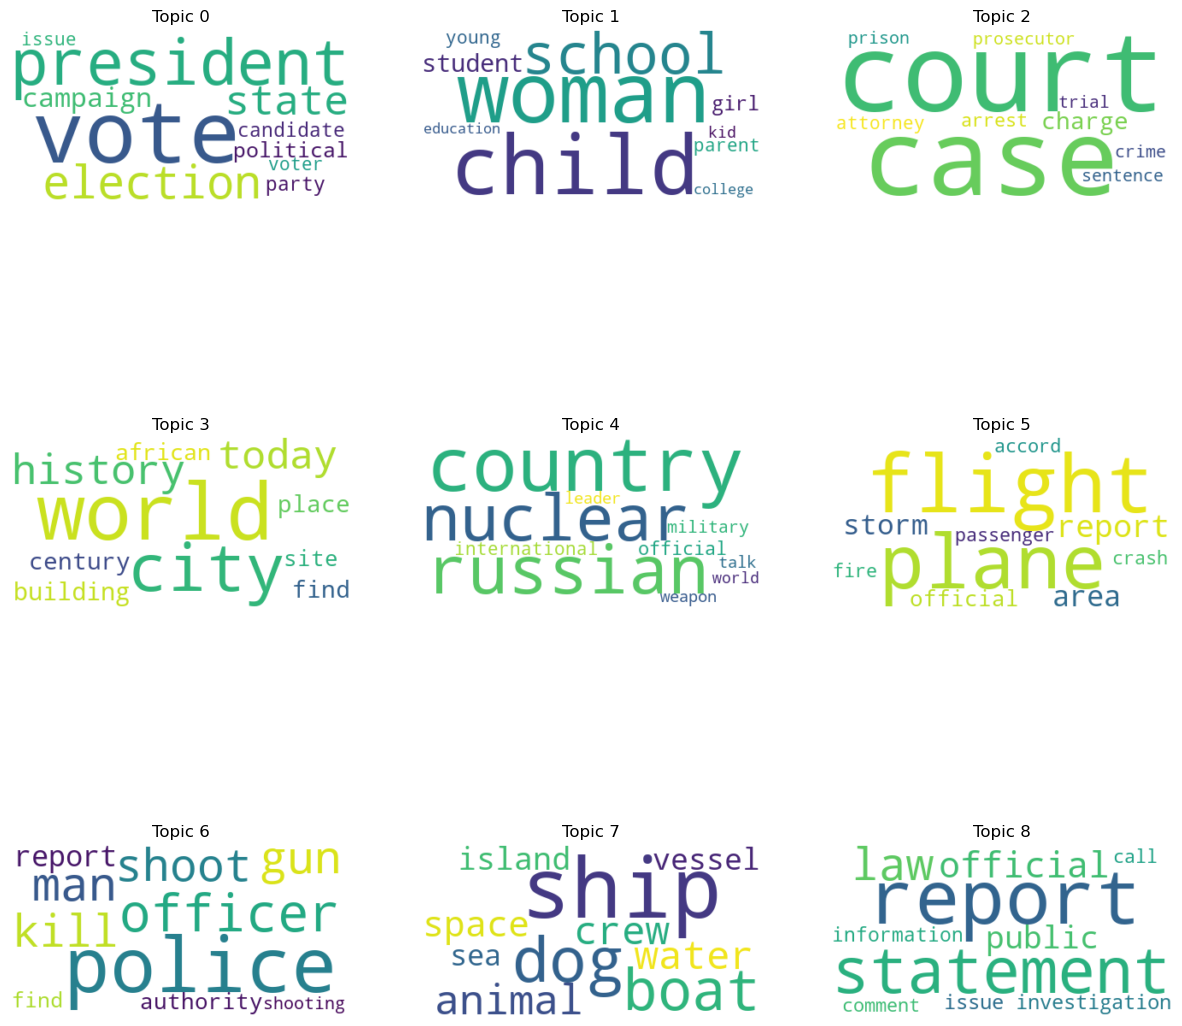

In [54]:
# visualize the first nine topics.
render_word_cloud(lda_model, 3, 3, 10)

# Finding similar documents.

Gensim has a **similarities** module which can build an index for a given set of documents using **MatrixSimilarity** which computes cosine similarity across a corpus and stores them in an index.<br>

In [55]:
lda_index = similarities.MatrixSimilarity(lda_model[corpus_bow_w_pos_filtered], num_features=len(dictionary_w_pos))

In [56]:
def get_similar_articles(index, model, article_bow, top_n=5, first_m_words=300):
  # model[article_bow] retrieves the topic distribution for the BOW.
  # index[model[article_bow] compares the topic distribution for the BOW against the similarity index previously computed.
  similar_docs = index[model[article_bow]]
  top_n_docs = sorted(enumerate(similar_docs), key=lambda item: -item[1])[1:top_n+1]

  # Return a list of tuples with each tuple: (article id, similarity score, first_m_words of article)
  return list(map(lambda entry: (entry[0], entry[1], articles[entry[0]][:first_m_words]), top_n_docs))

In [57]:
article_idx = 0
print(dataset[article_idx][:snippet_length], '\n')
get_similar_articles(lda_index, lda_model, corpus_bow_w_pos_filtered[article_idx])

 -- Children in war-ravaged Afghanistan are safer than those growing up in London or New York, NATO's top civilian envoy says.

Mark Sedwill, the senior civilian representative for NATO, made the comments on an episode of CBBC's "Newsround," which is airing Monday.

In the show -- a BBC current-affa 



[(12302,
  0.9734125,
  '\nMore than 11,000 children have been killed in the nearly three-year civil war in Syria, including young boys and girls who were tortured and executed, according to a report from a London-based think tank.\n\nThe Oxford Research Group said that most of the 11,420 children reported dead were killed in '),
 (13969,
  0.96700364,
  '\nChildren as young as 10 years old increasingly face horrific abuse in war-torn Somalia as the Islamist militant group Al-Shabaab has targeted them to replenish its diminishing ranks of fighters, according to a Human Rights Watch report released Tuesday.\n\nWhile the recruitment of child soldiers by t'),
 (10064,
  0.96499723,
  '\n -- Somalia\'s Al-Shabaab has brushed aside accusations from Human Rights Watch that the Islamist militia recruits child soldiers, saying that Islam considers people to be adults from the age of 15.\n\n"The allegations from Human Rights Watch say that Al-Shabaab recruits young children at the age of 1'),
 

In [58]:
article_idx = 10
print(dataset[article_idx][:snippet_length], '\n')
get_similar_articles(lda_index, lda_model, corpus_bow_w_pos_filtered[article_idx])


 -- The House Republican leadership upped the ante Thursday in the ongoing debate over the size and scope of the federal budget, unveiling a proposal to cut spending by $375 billion over the next five years.

House GOP Minority Whip Eric Cantor has been an outspoken critic of Democratic budget prop 



[(6590,
  0.9976948,
  "\n -- More than one speaker at the Democratic National Convention alleged this week that a Mitt Romney presidency would spell financial ruin for Medicare in four years.\n\nThe claim stems from earlier projections, made before the Democrats' health care reform law was passed in 2010, that Medicare's hos"),
 (7271,
  0.9972143,
  '\n -- House Budget Chairman Paul Ryan, R-Wisconsin, will unveil a highly anticipated 2012 Republican budget next week that proposes dramatic changes to political lightning rods: entitlements.\n\nThe plan, to be released Tuesday, calls for a controversial overhaul of Medicare, the health care program fo'),
 (12924,
  0.9959876,
  '\n -- As the Supreme Court prepares to hear arguments in the constitutionality of the health care reform law, CNN spoke with two experts on opposing sides of the issue.\n\nKaren Harned is executive director of Small Business Legal Center for the National Federation of Independent Business. The group, a'),
 (2804

In [59]:
article_idx = 100
print(dataset[article_idx][:snippet_length], '\n')
get_similar_articles(lda_index, lda_model, corpus_bow_w_pos_filtered[article_idx])


 -- A tip led to Wednesday's arrest in Louisiana of a suspected serial bank robber dubbed the "Granddad Bandit," federal authorities said.

Michael Francis Mara, 52, was captured at his home in Baton Rouge, FBI Special Agent Sheila Thorne told CNN.

The FBI went to the residence to execute an arres 



[(18369,
  0.973831,
  "\n -- More than 250 illegal guns have been seized by the New York City Police Department in the largest gun bust in the city's history, Mayor Michael Bloomberg announced Monday.\n\nThe guns were smuggled into New York City from North Carolina and South Carolina between September 2012 and July 2013 thro"),
 (6968,
  0.97088236,
  "\n -- An Australian businessman pleaded guilty Thursday to strapping a fake bomb around an 18-year-old girl's neck in an attempt to extort money from her family, a court representative said.\n\nThe guilty plea by Paul Douglas Peters at Sydney Central Local Court is the latest development in a case that"),
 (17704,
  0.9702211,
  '\nA West Virginia man who fatally shot four people and then himself was apparently disappointed with people in his life, including his ex-girlfriend, Monongalia County Sheriff Kenneth "Al" Kisner told CNN on Tuesday.\n\nOn Monday, Jody Lee Hunt, 39, of Westover, killed his ex, a man she was having a re'),
 (921

We can also query for documents similar to new, unseen documents

In [60]:
test_article = "Capricorn Business Acquisitions Inc. (TSXV: CAK.H) (the “Company“) is pleased to announce that its board has approved the issuance of 70,000 stock options (“Stock Options“) to directors on April 19, 2020."

article_tokens = list(map(improved_filter, [nlp(test_article)]))[0]
article_bow = dictionary_w_pos.doc2bow(article_tokens)
get_similar_articles(lda_index, lda_model, article_bow)

[(12158,
  0.9948242,
  '\n -- Almost hidden in the spectacular red rock country of northwestern New Mexico is a tiny charity that educates and houses almost 200 Native American children and their families.\n\nThe St. Bonaventure Indian Mission and School, affiliated with the Roman Catholic Diocese of Gallup, mostly survives o'),
 (12542,
  0.9926609,
  '\n -- A British parliamentary report slammed Barclays bank on Saturday for its "disgraceful" actions that led to a rate-rigging scandal.\n\nThe Treasury Select Committee issued a report after recent hearings over the scandal. Barclays was fined $450 million by British and American regulators after some'),
 (10769,
  0.99243736,
  '\n -- Nobel Laureate and microfinance pioneer Muhammad Yunus faced a new government fight Monday as the Cabinet ordered "legal action" against him for what it called "tax irregularities."\n\nThe Cabinet meeting, led by Prime Minister Sheikh Hasina, discussed a report prepared by the National Board of R'),
 (9

In [61]:
test_article = "DEA agent sentenced to 12 years in prison for conspiring with Colombian drug cartel."

article_tokens = list(map(improved_filter, [nlp(test_article)]))[0]
article_bow = dictionary_w_pos.doc2bow(article_tokens)
get_similar_articles(lda_index, lda_model, article_bow)

[(4232,
  0.99858594,
  "\n -- A former federal prosecutor was arrested Wednesday on charges related to the murder of a witness in a drug case, among many other counts, the U.S. Attorney's Office in Newark, New Jersey, said.\n\nFormer federal prosecutor Paul Bergrin is charged with leading a racketeering conspiracy that includ"),
 (6838,
  0.998375,
  '\n -- After nearly 21 hours of deliberations, the jury in the trial of former Penn State assistant football coach Jerry Sandusky reached a verdict Friday night. It found him guilty of 45 of 48 counts.\n\nThere originally were 52 charges against Sandusky. On Thursday, Judge John Cleland announced that t'),
 (18431,
  0.9975618,
  '\nLess than a week after drug lord Rafael Caro Quintero was released from prison because of procedural errors, the Mexican government wants him locked up.\n\nThe office of the Mexican attorney general late Wednesday said that it has issued a warrant for "provisional detention," acting on a request from'),
 (8540